In [41]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import pandas as pd
import glob
from astropy.table import vstack
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("../Ha-emitters-disk/Halpha-disk_splus_Mine_PerField_total_vphas.csv")

In [43]:
for i in df.columns:
    print(i)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r
sourceID
RAJ2000
DEJ2000
VPHASDR2
clean
cleanu
umag
e_umag
MJDu
cleang
gmag
e_gmag
MJDg
cleanr2
r2mag
e_r2mag
MJDr2
cleanha
Hamag
e_Hamag
M

In [50]:
# SPLUS
ri_splus = df["r"] - df["i"]
rj660_splus = df["r"] - df["F660"]

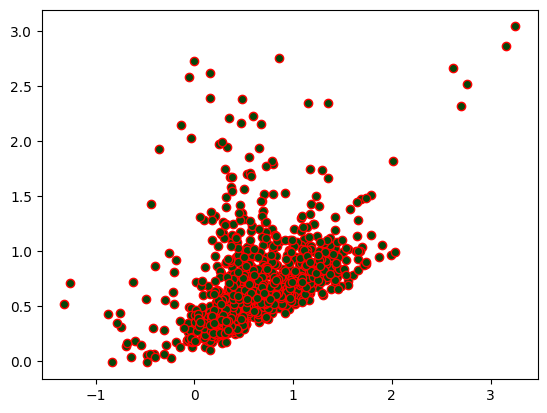

In [51]:
plt.scatter(ri_splus, rj660_splus, color=sns.xkcd_palette(["forest green"])[0], edgecolors="r",)

In [52]:
# VPHAS
ri_vphas = df["rmag"] - df["imag"]
rj660_vphas = df["rmag"] - df["Hamag"]

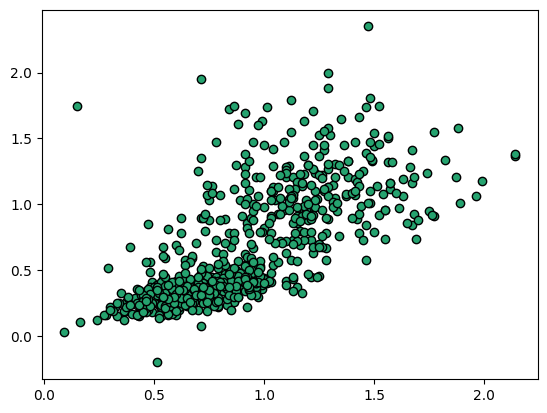

In [53]:
plt.scatter(ri_vphas, rj660_vphas, color=sns.xkcd_palette(["teal green"])[0], edgecolors="k",)

## Histograms 

In [54]:
# Differences between ri colors
ri_diff = ri_splus - ri_vphas

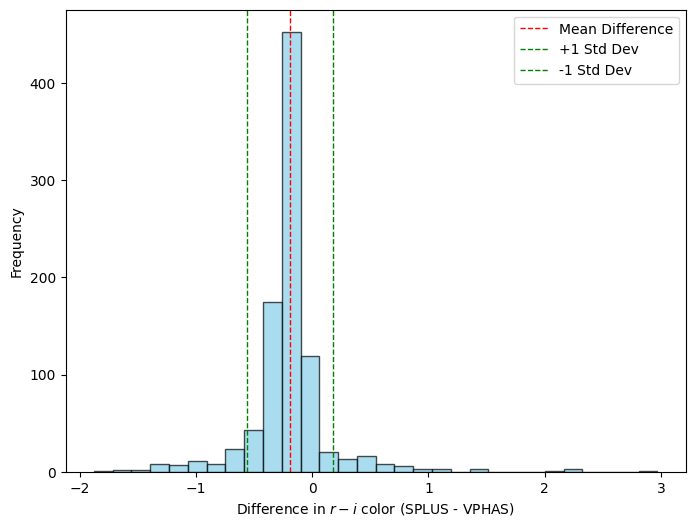

In [82]:


# Plot histogram of differences
plt.figure(figsize=(8, 6))
plt.hist(ri_diff, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Calculate mean and standard deviation
mean_diff = np.mean(ri_diff)
std_diff = np.std(ri_diff)

# Plot vertical lines for mean and mean +/- std
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=1, label='Mean Difference')
plt.axvline(mean_diff + std_diff, color='green', linestyle='dashed', linewidth=1, label='+1 Std Dev')
plt.axvline(mean_diff - std_diff, color='green', linestyle='dashed', linewidth=1, label='-1 Std Dev')

plt.xlabel('Difference in $r - i$ color (SPLUS - VPHAS)')
plt.ylabel('Frequency')
#plt.title('Histogram of Differences in $r-i$ color between SPLUS and VPHAS')
plt.legend()
plt.savefig("../Figs/comparison_SPLUS_VPHAS_ri.pdf")
plt.show()

In [83]:
# Print mean and standard deviation
print("Mean difference in ri color between SPLUS and VPHAS:", mean_diff)
print("Standard deviation of difference in ri color between SPLUS and VPHAS:", std_diff)

Mean difference in ri color between SPLUS and VPHAS: -0.19323352045209904
Standard deviation of difference in ri color between SPLUS and VPHAS: 0.3699534943691544


### R - Halpha

In [84]:
rj660_diff = rj660_splus - rj660_vphas

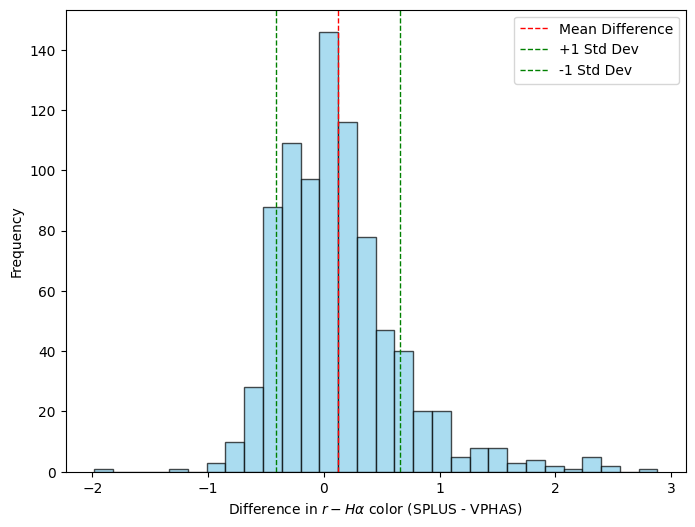

In [85]:
# Plot histogram of differences
plt.figure(figsize=(8, 6))
plt.hist(rj660_diff, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Calculate mean and standard deviation
mean_diff_ = np.mean(rj660_diff)
std_diff_ = np.std(rj660_diff)

# Plot vertical lines for mean and mean +/- std
plt.axvline(mean_diff_, color='red', linestyle='dashed', linewidth=1, label='Mean Difference')
plt.axvline(mean_diff_ + std_diff_, color='green', linestyle='dashed', linewidth=1, label='+1 Std Dev')
plt.axvline(mean_diff_ - std_diff_, color='green', linestyle='dashed', linewidth=1, label='-1 Std Dev')

plt.xlabel(r'Difference in $r - H\alpha$ color (SPLUS - VPHAS)')
plt.ylabel('Frequency')
#plt.title('Histogram of Differences in ri color between SPLUS and VPHAS')
plt.legend()
plt.savefig("../Figs/comparison_SPLUS_VPHAS_rj660.pdf")
plt.show()

In [86]:
# Print mean and standard deviation
print("Mean difference in ri color between SPLUS and VPHAS:", mean_diff_)
print("Standard deviation of difference in ri color between SPLUS and VPHAS:", std_diff_)

Mean difference in ri color between SPLUS and VPHAS: 0.12250285349940684
Standard deviation of difference in ri color between SPLUS and VPHAS: 0.5360972736983735
